**AdaBoost y GradientBoosting**

In [21]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

Usemos estos algoritmos como ejemplo para analizar cómo cambia la calidad del algoritmo dependiendo de la cantidad de árboles sobre los que está construido.

In [22]:
import pandas as pd   
import numpy as np

titanic = pd.read_csv(r"C:\Users\Ульяна\Desktop\jupiter\datasets\train_titanic .csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
columns_to_drop = ['Name','Sex', 'Ticket', 'Age', 'Cabin', 'Embarked']
titanic = titanic.drop(columns=columns_to_drop)

In [24]:
null_counts = titanic.isnull().sum()
null_counts

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
dtype: int64

Separemos inmediatamente la variable objetivo Sobrevivida.

In [25]:
targets = titanic.Survived
data = titanic.drop(columns='Survived')

Establezcamos el número de árboles en el algoritmo: 1, y luego de 10 a 100 en incrementos de 10.

In [26]:
trees = [1] + list(range(10,110,10))
trees

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

**AdaBoost**

In [27]:
ada_scoring = []
for tree in trees:
    ada = AdaBoostClassifier(n_estimators=tree)
    score = cross_val_score(ada, data, targets, scoring='roc_auc', cv=3)
    ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)

ada_scoring

matrix([[0.59541271, 0.61705493, 0.70498993],
        [0.64667817, 0.72097594, 0.78362573],
        [0.66393443, 0.74125204, 0.77679513],
        [0.67349727, 0.74223469, 0.76224715],
        [0.67330553, 0.74223469, 0.7545058 ],
        [0.67397661, 0.75812482, 0.7545058 ],
        [0.67397661, 0.75848433, 0.74846611],
        [0.67308983, 0.75881986, 0.72912472],
        [0.6663551 , 0.76334963, 0.71282715],
        [0.6663551 , 0.7637331 , 0.71282715],
        [0.66580385, 0.76426038, 0.71728502]])

**GradientBoosting**

In [28]:
gbc_scoring = []
for tree in trees:
    gbc = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(gbc, data, targets, scoring='roc_auc', cv=3)
    gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)

gbc_scoring

matrix([[0.64579139, 0.71043045, 0.74635701],
        [0.64337072, 0.69540313, 0.75076694],
        [0.66026747, 0.71282715, 0.77554884],
        [0.64296328, 0.71551146, 0.78647781],
        [0.64612693, 0.72198255, 0.77648356],
        [0.64296328, 0.727471  , 0.76943725],
        [0.64984182, 0.72315694, 0.77087528],
        [0.65710383, 0.72651232, 0.76512319],
        [0.6711485 , 0.72627265, 0.77018023],
        [0.67488735, 0.7275429 , 0.75905953],
        [0.66244847, 0.73161729, 0.75369092]])

**xgb_scoring**

In [29]:
xgb_scoring = []
for tree in trees:
    xgb = XGBClassifier(n_estimators=tree)
    score = cross_val_score(xgb, data, targets, scoring='roc_auc', cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

xgb_scoring

matrix([[0.59395072, 0.73744128, 0.75570415],
        [0.666427  , 0.67589397, 0.69406097],
        [0.66851213, 0.70273703, 0.69118493],
        [0.66721791, 0.70709903, 0.69283865],
        [0.67316173, 0.71452881, 0.68068737],
        [0.67181958, 0.71661394, 0.67881795],
        [0.67409644, 0.71699741, 0.6939651 ],
        [0.67673282, 0.71510402, 0.6933899 ],
        [0.68646343, 0.71337839, 0.68773368],
        [0.68838079, 0.72394785, 0.69039402],
        [0.6893874 , 0.72586521, 0.69037005]])

A primera vista, los algoritmos funcionan de forma casi idéntica. Ahora veamos en el gráfico si esto es cierto.

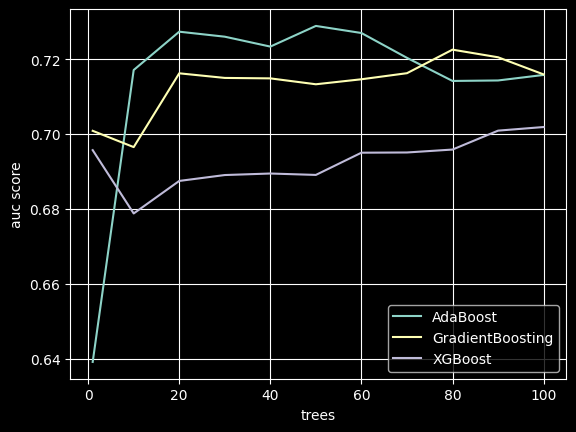

In [30]:
import matplotlib.pyplot as plt

plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scoring.mean(axis=1), label='XGBoost')
plt.grid(True)
plt.xlabel('trees')
plt.ylabel('auc score')
plt.legend(loc='lower right')

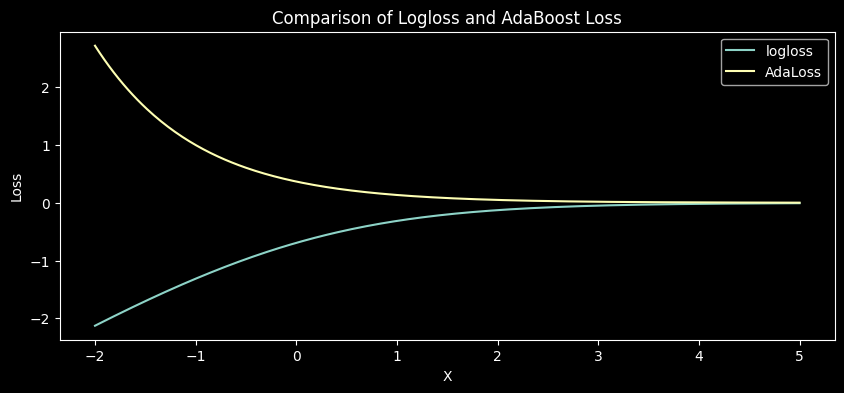

In [31]:
def logloss(x):
    return -np.log(1 + np.exp(-x))

def AdaLoss(x):
    return np.exp(-(1 + x))

# Genera 300 valores distribuidos uniformemente que van de -2 a 5
x = np.linspace(-2, 5, 300)


plt.figure(figsize=(10, 4))
plt.plot(x, logloss(x), label='logloss')
plt.plot(x, AdaLoss(x), label='AdaLoss')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Loss')
plt.title('Comparison of Logloss and AdaBoost Loss')

plt.show()


**Stacking**

Verificaremos el funcionamiento del replanteo en el mismo conjunto de datos convertido del Titanic.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    train_size=0.8,
                                                    random_state=0)

Dado que necesitamos entrenar los algoritmos básicos en el conjunto de entrenamiento y hacer predicciones sobre los mismos datos para entrenar el metaalgoritmo, dividimos los datos de entrenamiento en dos conjuntos de datos más: entrenado y válido.

In [34]:
train, valid, train_true, valid_true = train_test_split(x_train, 
                                                        y_train,
                                                        train_size=0.5,
                                                        random_state=0)

Entrenemos algoritmos básicos

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(train, train_true)

lr = LogisticRegression(random_state=17)
lr_model = lr.fit(train, train_true)

dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = lr.fit(train, train_true)

svc = SVC(random_state=17)
svc_model = svc.fit(train, train_true)

Este código realiza la construcción de conjuntos de modelos en los que se utilizan cuatro modelos base diferentes (K-Nearest Neighbours, Logistic Regression, Decision Tree Classifier y Support Vector Classifier) para crear meta-atributos y, a continuación, estos meta-atributos se utilizan para entrenar el metamodelo XGBoost

In [36]:
models = [knn_model, lr_model, dtc_model, svc_model]
meta_mtrx = np.empty((valid.shape[0], len(models))) # Se crea una matriz meta_mtrx vacía de tamaño (número de objetos en el conjunto de validación, número de modelos)

for n, model in enumerate(models): # enumerate es una función incorporada en Python que le permite iterar sobre una secuencia (como una lista o tupla) junto con índices de elementos
    meta_mtrx[:, n] = model.predict(valid)
    predicted = model.predict(x_test)
    print(f'{n} auc: {roc_auc_score(y_test, predicted)}')
    
meta = XGBClassifier(n_estimators=40)
meta_model = meta.fit(meta_mtrx, valid_true)

0 auc: 0.5909749670619237
1 auc: 0.6763504611330698
2 auc: 0.6763504611330698
3 auc: 0.5507246376811594


In [37]:
meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)
    
meta_predict = meta.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

Stacking AUC: 0.6375494071146245


*AUC-ROC* (Area Under the Receiver Operating Characteristic curve) es una métrica utilizada para evaluar la calidad de un modelo de clasificación binaria. La curva ROC es un gráfico que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en diferentes umbrales de clasificación.